### 목표
 - 1. pandas, matplotlib 라이브러리를 정리해보자
 - 2. 카톡 데이터를 통해 가장 톡 빈도수가 높은 사람을 파악해보자
 - 3. 일자별 카톡 빈도수 추이를 확인해보자 & 시각화

In [1]:
# 필요한 도구 불러오기
import pandas as pd # 테이블 형식 데이터 다루는 라이브러리
import numpy as np # 다차원의 배열 제공하는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
# 한글 글꼴 설정 필요 -> 그래프 때문에 해주는 이유이기도 함
from matplotlib import rc
rc('font',family = 'Malgun Gothic')

In [6]:
# 데이터 담을 변수
ai_class = pd.read_csv('data/sm_ai_class_kkt.csv', encoding = 'euc-kr')
ai_class

,date,content
0,2022-07-18,[채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!
1,2022-07-18,[강나린] 화이팅~~
2,2022-07-18,[김민수] 화이팅!!
3,2022-07-18,[김새람] 화이팅!!!
4,2022-07-18,[김승민] 화이팅~
5,2022-07-19,[채수민] 여러분 새로운 주가 시작된 기분이네요 ㅎㅎ 다들 잘 쉬셨나요 ? 화이팅합시다!
6,2022-07-19,[김혜나] 화이팅!
7,2022-07-19,[노준호] 화이팅!!
8,2022-07-19,[박예림] 화이팅!!!
9,2022-07-19,[강나린] 화이팅~~~


In [7]:
# 데이터를 불러왔을 때 가장 먼저 하는 작업 ?? 
# 전체 데이터의 속성 확인
# 데이터 크기
# 데이터 타입
# 데이터 결측치 확인
# info()
ai_class.info()
# 49, 2 / ai_class.shape -> (49.2)
# Non-null Count 결측치 확인 데이터 확인해보면 결측치가 없다는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     49 non-null     object
 1   content  49 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes


In [10]:
# 데이터를 위에서부터 5개의 행만 출력 , () 안에 shift+tab 하면 정보를 볼 수 있음
ai_class.head() # 3개만 보고싶으면 ai_class.head(3) 하면 됨

,date,content
0,2022-07-18,[채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!
1,2022-07-18,[강나린] 화이팅~~
2,2022-07-18,[김민수] 화이팅!!
3,2022-07-18,[김새람] 화이팅!!!
4,2022-07-18,[김승민] 화이팅~


In [11]:
ai_class.tail(3)

,date,content
46,2022-07-21,[오 늘] 화이팅!
47,2022-07-21,[정상훈] (이모티콘)
48,2022-07-21,[김민수] 네^^


### 전처리 - 데이터 정리

#### content에서 이름 데이터 추출하기
 - 이름 문자열만 추출해서 새로운 name컬럼에 저장하기
 - str이라는 키워드를 배워보자

str : 판다스 객체 내의 문자열 데이터 접근하여 처리할때 사용

In [14]:
# 예시)
# date 컬럼 2022 -> 2023
# 컬럼인덱싱 3가지 방법
# ai_class.loc[:,'date'] # 문자로 접근
# ai_class.iloc[:,0] # 숫자로 접근
ai_class['date'].replace('2022','2023') # 이거 안됨 이유는 아래
# 단순히 replace('2022','2023')하면 안바뀜 왜냐면 serice이기 때문에 -> str사용해야함

# str 사용해서 변경하기(문자열에 접근하게 하는것이 str)
ai_class['date'].str.replace('2022','2023')

0     2023-07-18
1     2023-07-18
2     2023-07-18
3     2023-07-18
4     2023-07-18
5     2023-07-19
6     2023-07-19
7     2023-07-19
8     2023-07-19
9     2023-07-19
10    2023-07-19
11    2023-07-19
12    2023-07-19
13    2023-07-19
14    2023-07-19
15    2023-07-19
16    2023-07-20
17    2023-07-20
18    2023-07-20
19    2023-07-20
20    2023-07-20
21    2023-07-20
22    2023-07-20
23    2023-07-20
24    2023-07-20
25    2023-07-20
26    2023-07-20
27    2023-07-20
28    2023-07-20
29    2023-07-20
30    2023-07-20
31    2023-07-21
32    2023-07-21
33    2023-07-21
34    2023-07-21
35    2023-07-21
36    2023-07-21
37    2023-07-21
38    2023-07-21
39    2023-07-21
40    2023-07-21
41    2023-07-21
42    2023-07-21
43    2023-03-05
44    2023-07-21
45    2023-07-21
46    2023-07-21
47    2023-07-21
48    2023-07-21
Name: date, dtype: object

이름 데이터 추출하기

In [45]:
# content 내용 컬럼에 담겨있는 이름을 확인하기
ai_class['content']

# 이름 데이터만 슬라이싱 해보자
# [시작인덱스:끝인덱스]
# str : serice에서 문자열에 접근할 수 있는 것
ai_class['content'].str[1:4]

# 새로 다시 컬럼에 넣는방법 (이름컬럼을 기존 컬럼에 추가)
ai_class['name'] = ai_class['content'].str[1:4]
ai_class.head(3)

,date,content,name
0,2022-07-18,[채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!,채수민
1,2022-07-18,[강나린] 화이팅~~,강나린
2,2022-07-18,[김민수] 화이팅!!,김민수


In [76]:
# 오늘씨의 이름이 [오_늘]이 아니라 [오늘]일 경우는 
# 어떻게 전체를 동시에 이름만 추출할 수 있을까요?
# split() : 특정값을 기준을 문자열을 분리하는 함수
# split()은 리스트형식으로 반환해줌
ai_class['content'].str.split(']').str[0].str[1:]

0     채수민
1     강나린
2     김민수
3     김새람
4     김승민
5     채수민
6     김혜나
7     노준호
8     박예림
9     강나린
10    신동익
11    염선욱
12    오 늘
13    최영화
14    오유미
15    이국진
16    채수민
17    이새롬
18    이정인
19    이준영
20    이준호
21    이창규
22    이현제
23    장재일
24    정상훈
25    정종선
26    조성국
27    최신애
28    장재일
29    오 늘
30    염선욱
31    채수민
32    오 늘
33    김혜나
34    장재일
35    이준영
36    오유미
37    강나린
38    김새람
39    이정인
40    오 늘
41    정상훈
42    김민수
43    채수민
44    김새람
45    강나린
46    오 늘
47    정상훈
48    김민수
Name: content, dtype: object

현재는 내용이 중요한게 아니다 !
단순한 분석을 하고 있기 때문에 빈도수만 카운트해보자

In [80]:
# 각 사람이 몇번 씩 톡을 보냈는지 세어보기
# 1. 이름 컬럼 인덱싱(접근)
ai_class['name']
# ai_class.loc[:,'name']
# ai_class.iloc[:,2]
# 2. 1결과에 대해서 value값을 카운팅
# .value_counts()
name_counts = ai_class['name'].value_counts()
name_counts

채수민    5
오 늘    5
강나린    4
김민수    3
김새람    3
정상훈    3
장재일    3
이준영    2
이정인    2
오유미    2
염선욱    2
김혜나    2
최영화    1
신동익    1
이국진    1
이새롬    1
박예림    1
노준호    1
이준호    1
이창규    1
이현제    1
김승민    1
정종선    1
조성국    1
최신애    1
Name: name, dtype: int64

카톡 빈도수 시각화

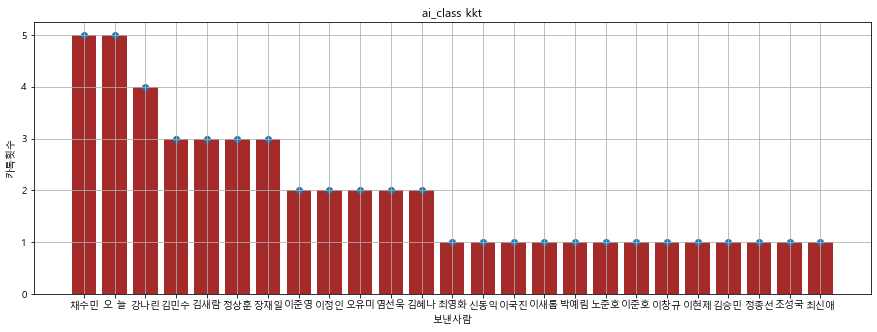

In [92]:
# 개인별 카톡 보낸 횟수 -> 막대그래프로 시각화

# 보낸 사람 이름
x = name_counts.index # 1차원 데이터
# 보낸 횟수
y = name_counts.values # 1차원 데이터 # name_counts => 1차원
y

plt.figure(figsize=(15,5)) # 그래프의 x,y 크기 설정
plt.bar(x,y, color='brown') # 막대그래프
plt.scatter(x,y) # 산점도 그래프 (점을 찍어서 데이터 위치 확인)
plt.xlabel('보낸사람')
plt.ylabel('카톡횟수')
plt.title('ai_class kkt')
plt.grid() # 눈금격자
plt.show()

우리반에서 카톡 빈도수가 2건 이상인 사람들만 추출해보자

In [96]:
# 불리언 인덱싱을 활용하여 2건 이상인 사람이름 접근해보기
name_counts[name_counts >=2]

채수민    5
오 늘    5
강나린    4
김민수    3
김새람    3
정상훈    3
장재일    3
이준영    2
이정인    2
오유미    2
염선욱    2
김혜나    2
Name: name, dtype: int64

In [106]:
# 인덱싱(데이터 접근하기) 실습하기
# 채수민 쌤의 멘트 확인해보기 2가지 방법
ai_class[ai_class['name']=='채수민']['content']
# 데이터.loc[행,열]
ai_class.loc[ai_class['name']=='채수민','content']
# 불리언 인덱싱
# 1. 행인덱싱 된 것 
# 2. loc인덱서와 호환해서 사용 가능 (iloc 불가), iloc = 숫자 / loc = 문자

0             [채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!
5     [채수민] 여러분 새로운 주가 시작된 기분이네요 ㅎㅎ 다들 잘 쉬셨나요 ? 화이팅합시다!
16            [채수민] (이모티콘)오늘은 빵 간식 있습니다! 맛있게 먹고 또 힘내봅시다
31           [채수민] 새로운 아침이 되었습니다! 우리반은 온라인으로 진행될 예정이에요!
43                  [채수민] 한주 마지막 날인 금요일 입니다. 오늘도 화이팅!!~
Name: content, dtype: object

In [115]:
# '오늘'의 멘트 데이터 확인하기
len(ai_class.iloc[12,2])

3

In [117]:
ai_class[ai_class['name']=='오 늘']['content']
ai_class.loc[ai_class['name']=='오 늘','content']

12             [오 늘] QR 완료!
29    [오 늘] 캡처 단축키 알려주세요..!
32                [오 늘] 화이팅
40           [오 늘] 이해했습니다 ~
46               [오 늘] 화이팅!
Name: content, dtype: object

In [121]:
# 본인데이터 확인할 것
ai_class[ai_class['name']=='이준영']['content']
ai_class.loc[ai_class['name']=='이준영','content']

19      [이준영] 화이팅
35    [이준영] 화이팅!!
Name: content, dtype: object

일자별 카톡 빈도수 추이 확인해보기
 - 연도, 월일 따로 추출하여 각각의 새로운 컬럼으로 추가하기

In [141]:
# 연도 컬럼 생성하기
# 방법 1
ai_class['year']=ai_class['date'].str[0:4]
# 방법 2
ai_class['year'] = '2022'


,date,content,name,year,mth/d
0,2022-07-18,[채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!,채수민,2022,07-18
1,2022-07-18,[강나린] 화이팅~~,강나린,2022,07-18
2,2022-07-18,[김민수] 화이팅!!,김민수,2022,07-18
3,2022-07-18,[김새람] 화이팅!!!,김새람,2022,07-18
4,2022-07-18,[김승민] 화이팅~,김승민,2022,07-18
5,2022-07-19,[채수민] 여러분 새로운 주가 시작된 기분이네요 ㅎㅎ 다들 잘 쉬셨나요 ? 화이팅합시다!,채수민,2022,07-19
6,2022-07-19,[김혜나] 화이팅!,김혜나,2022,07-19
7,2022-07-19,[노준호] 화이팅!!,노준호,2022,07-19
8,2022-07-19,[박예림] 화이팅!!!,박예림,2022,07-19
9,2022-07-19,[강나린] 화이팅~~~,강나린,2022,07-19


In [151]:
# 월일자 컬럼
ai_class['mth/d']=ai_class['date'].str.replace('-','').str[4:]
ai_class.head()

,date,content,name,year,mth/d
0,2022-07-18,[채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!,채수민,2022,0718
1,2022-07-18,[강나린] 화이팅~~,강나린,2022,0718
2,2022-07-18,[김민수] 화이팅!!,김민수,2022,0718
3,2022-07-18,[김새람] 화이팅!!!,김새람,2022,0718
4,2022-07-18,[김승민] 화이팅~,김승민,2022,0718


In [152]:
ai_class.columns

Index(['date', 'content', 'name', 'year', 'mth/d'], dtype='object')

In [155]:
# 삭제하는 함수
# 판다스에서 데이터를 떨어뜨린다! drop
ai_class.drop('date', axis = 1, inplace = True)

In [156]:
ai_class.head()

,content,name,year,mth/d
0,[채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!,채수민,2022,0718
1,[강나린] 화이팅~~,강나린,2022,0718
2,[김민수] 화이팅!!,김민수,2022,0718
3,[김새람] 화이팅!!!,김새람,2022,0718
4,[김승민] 화이팅~,김승민,2022,0718


일자별로 된 컬럼에 접근하여 등장횟수 카운팅하기

In [168]:
# .value_counts()
d_counts = ai_class['mth/d'].value_counts()

# 시각화를 위해 데이터 정리해보자
# 인덱스 정렬 - 날짜 순서 정리
d_counts.sort_index()

0718     5
0719    11
0720    15
0721    18
Name: mth/d, dtype: int64

In [167]:
# 날짜 데이터 바꿔주자
# 데이터 변경 1. 위치접근 2. 대입
ai_class.iloc[43:,3] = '0721'
ai_class.iloc[43:]

,content,name,year,mth/d
43,[채수민] 한주 마지막 날인 금요일 입니다. 오늘도 화이팅!!~,채수민,2022,0721
44,[김새람] (이모티콘)넵!,김새람,2022,0721
45,[강나린] (이모티콘),강나린,2022,0721
46,[오 늘] 화이팅!,오 늘,2022,0721
47,[정상훈] (이모티콘),정상훈,2022,0721
48,[김민수] 네^^,김민수,2022,0721


In [186]:
# .value_counts()
d_counts = ai_class['mth/d'].value_counts()

# 시각화를 위해 데이터 정리해보자
# 인덱스 정렬 - 날짜 순서 정리
d_counts = d_counts.sort_index()

일자별 카톡 횟수 현황 시각화 - 선그래프

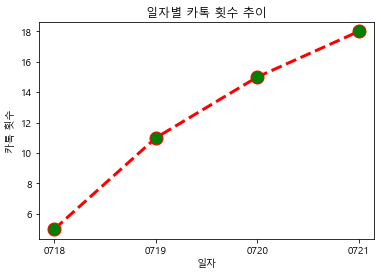

In [193]:
x = d_counts.index # 날짜 데이터 x축 연결
y = d_counts.values # 횟수 데이터 y축 연결
#plt.figure(figsize=(15,5)) # 그래프의 x,y 크기 설정
plt.plot(x,y,ls = '--', lw=3, color='red', marker='o', mfc='green' ,ms=13)
plt.scatter(x,y) # 산점도 그래프 (점을 찍어서 데이터 위치 확인)
plt.xlabel('일자')
plt.ylabel('카톡 횟수')
plt.title('일자별 카톡 횟수 추이')
plt.show()

### apply : 판다스 객체에 더 복잡한 처리를 하고 싶을 때 사용하는 함수
 - 사용자가 원하는대로 함수를 정의하고 그 함수를 데이터에 연결하여 처리

In [194]:
# apply 예시
def str_print(s):
    """ apply 예시 함수, 단순하게 출력하는 함수를 짜보자 """
    print(s)
    return 'return'

In [200]:
# apply 예시 ai_class = 2차원 dataframe임 방향 2개 행,열
# 2차원 데이터일 경우 axis = 0 행방향/열단위처리 , axis =1 열방향 / 행단위처리
ai_class.apply(str_print, axis = 1)

content    [채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!
name                                             채수민
year                                            2022
mth/d                                           0718
Name: 0, dtype: object
content    [강나린] 화이팅~~
name               강나린
year              2022
mth/d             0718
Name: 1, dtype: object
content    [김민수] 화이팅!!
name               김민수
year              2022
mth/d             0718
Name: 2, dtype: object
content    [김새람] 화이팅!!!
name                김새람
year               2022
mth/d              0718
Name: 3, dtype: object
content    [김승민] 화이팅~
name              김승민
year             2022
mth/d            0718
Name: 4, dtype: object
content    [채수민] 여러분 새로운 주가 시작된 기분이네요 ㅎㅎ 다들 잘 쉬셨나요 ? 화이팅합시다!
name                                                     채수민
year                                                    2022
mth/d                                                   0719
Name: 5, dtype: object
content    [김혜나] 화이팅!
name            

0     return
1     return
2     return
3     return
4     return
5     return
6     return
7     return
8     return
9     return
10    return
11    return
12    return
13    return
14    return
15    return
16    return
17    return
18    return
19    return
20    return
21    return
22    return
23    return
24    return
25    return
26    return
27    return
28    return
29    return
30    return
31    return
32    return
33    return
34    return
35    return
36    return
37    return
38    return
39    return
40    return
41    return
42    return
43    return
44    return
45    return
46    return
47    return
48    return
dtype: object

특정 문자열 제거하는 전처리

In [213]:
# ㅎ , ~ , (이모티콘) 삭제해보자
# 가진 행의 개수 49개
# 자동화 코드 연결
# strip() 양쪽 공백 제거, rstrip() 오른쪽 공백 제거, lstrip() 왼쪽 공백 제거
def txt_prepro(s):
    if ('^^','') or ('ㅎ' in s) or ('~' in s) or('(이모티콘)' in s):
        return s.replace('^^','').replace('ㅎ','').replace('~','').replace('(이모티콘)','').strip()
    else:
        return s

In [214]:
ai_class['content'].apply(str_print) # 문장 하나하나를 처리단위로 보고 있음 
#ai_class['content'] : 1차원데이터

[채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!
[강나린] 화이팅
[김민수] 화이팅!!
[김새람] 화이팅!!!
[김승민] 화이팅
[채수민] 여러분 새로운 주가 시작된 기분이네요  다들 잘 쉬셨나요 ? 화이팅합시다!
[김혜나] 화이팅!
[노준호] 화이팅!!
[박예림] 화이팅!!!
[강나린] 화이팅
[신동익] QR 완료
[염선욱] QR 완료
[오 늘] QR 완료!
[최영화] 온라인이신분들 카톡하나씩 남겨주세요
[오유미] 화장실가느라 출석못봤어요
[이국진] 썜  죄송한뎅 QR점용.....
[채수민] 오늘은 빵 간식 있습니다! 맛있게 먹고 또 힘내봅시다
[이새롬] 화이팅!!
[이정인] 화이팅
[이준영] 화이팅
[이준호] 넵
[이창규] 네
[이현제] 네
[장재일] 넹
[정상훈] 네
[정종선] 넹
[조성국] 쌤 제 자리 한번 봐주실수 있나용
[최신애] 넹!
[장재일] 넹!
[오 늘] 캡처 단축키 알려주세요..!
[염선욱] 쌤 전체 코드 한번 올려주세요
[채수민] 새로운 아침이 되었습니다! 우리반은 온라인으로 진행될 예정이에요!
[오 늘] 화이팅
[김혜나] 화이팅
[장재일] 화이팅
[이준영] 화이팅!!
[오유미] 화이팅!
[강나린] 화이팅!!
[김새람] 넵
[이정인] 네
[오 늘] 이해했습니다
[정상훈] 오타있는지랑 대소문자 확인해보세요
[김민수] 네
[채수민] 한주 마지막 날인 금요일 입니다. 오늘도 화이팅!!
[김새람] 넵!
[강나린]
[오 늘] 화이팅!
[정상훈]
[김민수] 네^^


0     return
1     return
2     return
3     return
4     return
5     return
6     return
7     return
8     return
9     return
10    return
11    return
12    return
13    return
14    return
15    return
16    return
17    return
18    return
19    return
20    return
21    return
22    return
23    return
24    return
25    return
26    return
27    return
28    return
29    return
30    return
31    return
32    return
33    return
34    return
35    return
36    return
37    return
38    return
39    return
40    return
41    return
42    return
43    return
44    return
45    return
46    return
47    return
48    return
Name: content, dtype: object

In [215]:
ai_class['content'] = ai_class['content'].apply(txt_prepro)
ai_class['content']

0           [채수민] 여러분 좋은 아침입니다! 좋은 주말 보내셨나요 ? 화이팅합시다!
1                                           [강나린] 화이팅
2                                         [김민수] 화이팅!!
3                                        [김새람] 화이팅!!!
4                                           [김승민] 화이팅
5     [채수민] 여러분 새로운 주가 시작된 기분이네요  다들 잘 쉬셨나요 ? 화이팅합시다!
6                                          [김혜나] 화이팅!
7                                         [노준호] 화이팅!!
8                                        [박예림] 화이팅!!!
9                                           [강나린] 화이팅
10                                        [신동익] QR 완료
11                                        [염선욱] QR 완료
12                                       [오 늘] QR 완료!
13                          [최영화] 온라인이신분들 카톡하나씩 남겨주세요
14                                [오유미] 화장실가느라 출석못봤어요
15                            [이국진] 썜  죄송한뎅 QR점용.....
16                [채수민] 오늘은 빵 간식 있습니다! 맛있게 먹고 또 힘내봅시다
17                                        [이새롬] 화이팅!!
18                          

In [ ]:
#'^^' 없애고 싶으면 어떻게 ? 